Здесь будут удалены признаки PassengerId, Name, Ticket, Cabin. Также введен будет вместо SibSp, Parch столбец Quantity_r - общее количество родственников.

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#### Подготовка данных

Удаляем ненужные столбцы

In [3]:
a = ["PassengerId", "Name", "Ticket", "Cabin"]
train.drop(a, axis = 1, inplace = True)
test.drop(a, axis = 1, inplace = True)

Вместо SibSp, Parch вводим столбец Quantity_r

In [4]:
train["Quantity_r"] = pd.Series(train["Parch"] + train["SibSp"], 
                            index=train.index)
test["Quantity_r"] = pd.Series(test["Parch"] + test["SibSp"], 
                            index=test.index)

a = ["Parch", "SibSp"]
train.drop(a, axis = 1, inplace = True)
test.drop(a, axis = 1, inplace = True)

Проверка пропущенных значений.

In [5]:
train.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age           177
Fare            0
Embarked        2
Quantity_r      0
dtype: int64

In [6]:
train["Embarked"] = train["Embarked"].fillna("S")
train["Age"] = train["Age"].fillna((train["Age"].mean()))

In [7]:
test.isnull().sum()

Pclass         0
Sex            0
Age           86
Fare           1
Embarked       0
Quantity_r     0
dtype: int64

In [8]:
test['Fare'] = test['Fare'].fillna((test['Fare'].mean()))
test["Age"] = test["Age"].fillna((test["Age"].mean()))

Заменяем female на 0, male - на 1. Также заменяем S на 2, Q - на 1, C - на 0.

In [9]:
train["Sex"] = train["Sex"].map({'female': 0, 'male': 1})
test["Sex"] = test["Sex"].map({'female': 0, 'male': 1})

train["Embarked"] = train["Embarked"].map({'S': 2, 'Q': 1, 'C': 0})
test["Embarked"] = test["Embarked"].map({'S': 2, 'Q': 1, 'C': 0})

In [10]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Quantity_r
0,0,3,1,22.0,7.2500,2,1
1,1,1,0,38.0,71.2833,0,1
2,1,3,0,26.0,7.9250,2,0
3,1,1,0,35.0,53.1000,2,1
4,0,3,1,35.0,8.0500,2,0


In [11]:
test.head()

,Pclass,Sex,Age,Fare,Embarked,Quantity_r
0,3,1,34.5,7.8292,1,0
1,3,0,47.0,7.0000,2,1
2,2,1,62.0,9.6875,1,0
3,3,1,27.0,8.6625,2,0
4,3,0,22.0,12.2875,2,2


Разделяем данные

In [13]:
X = train.iloc[:, 1:7].values
Y = train.iloc[:, 0].values

In [14]:
X

array([[ 3.        ,  1.        , 22.        ,  7.25      ,  2.        ,
         1.        ],
       [ 1.        ,  0.        , 38.        , 71.2833    ,  0.        ,
         1.        ],
       [ 3.        ,  0.        , 26.        ,  7.925     ,  2.        ,
         0.        ],
       ...,
       [ 3.        ,  0.        , 29.69911765, 23.45      ,  2.        ,
         3.        ],
       [ 1.        ,  1.        , 26.        , 30.        ,  0.        ,
         0.        ],
       [ 3.        ,  1.        , 32.        ,  7.75      ,  1.        ,
         0.        ]])

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.4, random_state=4)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(534, 6) (357, 6) (534,) (357,)


#### KNN

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

Проводим масштабирование данных и посмотрим результаты обучения для моделей с числом соседей от 1 до 15

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [77]:
kk = range(1, 15)

scores = []
err_train = []
err_test = []

for k in kk:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    err_train.append(np.mean(knn.predict(X_train) != y_train))
    err_test.append(np.mean(knn.predict(X_test) != y_test))

In [78]:
print("Доля правильно спрогнозированных выборок \n", scores)

Доля правильно спрогнозированных выборок 
 [0.7955182072829131, 0.7927170868347339, 0.8263305322128851, 0.8431372549019608, 0.8319327731092437, 0.8375350140056023, 0.8151260504201681, 0.8263305322128851, 0.8207282913165266, 0.84593837535014, 0.834733893557423, 0.8375350140056023, 0.8291316526610645, 0.8263305322128851]


(15, 0)

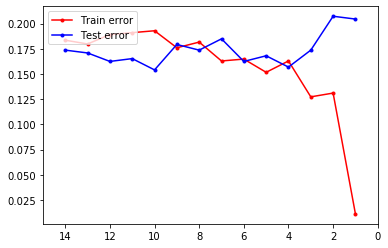

In [79]:
plt.plot(kk, err_train, '.-r', label = 'Train error')
plt.plot(kk, err_test,  '.-b', label = 'Test error')    
plt.legend(loc = 2)
plt.xlim([15, 0])

In [80]:
print(min(err_test))
print(kk[err_test.index(min(err_test))])
print(scores[kk[err_test.index(min(err_test))]])

0.15406162464985995
10
0.834733893557423


Наиболее хороший результат дает обучение с 10 сеседями.  
Оценка алогитма:

              precision    recall  f1-score   support

           0       0.83      0.96      0.89       234
           1       0.90      0.63      0.74       123

    accuracy                           0.85       357
   macro avg       0.86      0.79      0.81       357
weighted avg       0.85      0.85      0.84       357

[[225   9]
 [ 46  77]]


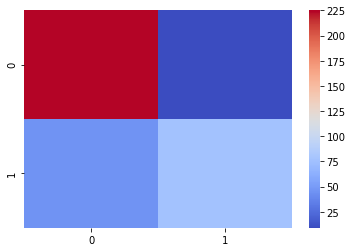

In [81]:
knn1 = KNeighborsClassifier(n_neighbors=kk[err_test.index(min(err_test))])
knn1.fit(X_train, y_train)
y_pred = knn1.predict(X_test)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred = knn1.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), cmap="coolwarm");

In [82]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print('Средняя абсолютная ошибка', mean_absolute_error(y_test, y_pred))
print('Среднеквадратическая ошибка', mean_squared_error(y_test, y_pred))

rez = []
rez = [accuracy_score(y_test, y_pred)]

Средняя абсолютная ошибка 0.15406162464985995
Среднеквадратическая ошибка 0.15406162464985995


#### Логистическая регрессия

In [83]:
from sklearn.linear_model import LogisticRegression

Обучение:

In [84]:
lrg = LogisticRegression()
lrg.fit(X_train, y_train)

LogisticRegression()

Оценка алгоритма:

In [85]:
y_pred = lrg.predict(X_test)
err_train_lrg = np.mean(lrg.predict(X_train) != y_train)
err_test_lrg = np.mean(lrg.predict(X_test) != y_test)
print("Доля правильно спрогнозированных выборок:", accuracy_score(y_test, y_pred))
print("error_train =", err_train_lrg)
print("error_test =", err_test_lrg)

Доля правильно спрогнозированных выборок: 0.8291316526610645
error_train = 0.21910112359550563
error_test = 0.17086834733893558


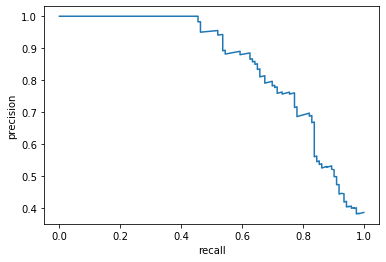

In [86]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, lrg.predict_proba(X_test)[:, 1])
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       234
           1       0.76      0.73      0.75       123

    accuracy                           0.83       357
   macro avg       0.81      0.81      0.81       357
weighted avg       0.83      0.83      0.83       357

[[206  28]
 [ 33  90]]


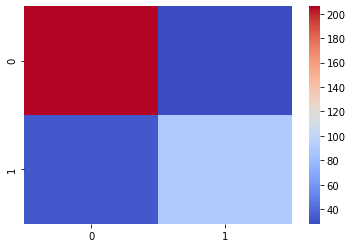

In [87]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), cmap="coolwarm");

In [88]:
print('Средняя абсолютная ошибка', mean_absolute_error(y_test, y_pred))
print('Среднеквадратическая ошибка', mean_squared_error(y_test, y_pred))
rez.append(accuracy_score(y_test, y_pred))

Средняя абсолютная ошибка 0.17086834733893558
Среднеквадратическая ошибка 0.17086834733893558


#### Деревья решений

Сначала посмотрим наилучший результат для разной глубины

In [89]:
from sklearn import tree

scores = []
err_train = []
err_test = []

kk = range(1, 10)
for max_depth in kk:
    clf = tree.DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    err_train.append(np.mean(clf.predict(X_train) != y_train))
    err_test.append(np.mean(clf.predict(X_test) != y_test))   

In [90]:
print("Доля правильно спрогнозированных выборок \n", scores)

Доля правильно спрогнозированных выборок 
 [0.8067226890756303, 0.8067226890756303, 0.8375350140056023, 0.834733893557423, 0.8571428571428571, 0.8151260504201681, 0.8095238095238095, 0.8067226890756303, 0.7899159663865546]


(15, 0)

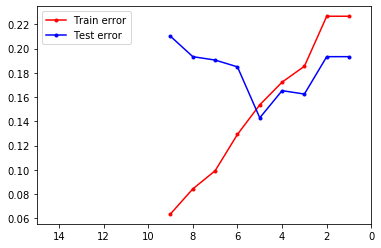

In [91]:
plt.plot(kk, err_train, '.-r', label = 'Train error')
plt.plot(kk, err_test,  '.-b', label = 'Test error')    
plt.legend(loc = 2)
plt.xlim([15, 0])

In [92]:
print(min(err_test))
print(kk[err_test.index(min(err_test))])
print(scores[kk[err_test.index(min(err_test))]])

0.14285714285714285
5
0.8151260504201681


Наилучший результат достигается при max_depth = 5.  
Теперь для максимального числа признаков:

In [93]:
scores = []

kk = range(1, 7)
for i in kk:
    clf = tree.DecisionTreeClassifier(max_depth=5, max_features = i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
print(scores)
print(scores.index(max(scores)), " : ", max(scores))

[0.7591036414565826, 0.8431372549019608, 0.84593837535014, 0.84593837535014, 0.8487394957983193, 0.8543417366946778]
5  :  0.8543417366946778


Наилучший результат: max_depth = 5, max_features = 5.  
Оценка алгоритма:

              precision    recall  f1-score   support

           0       0.83      0.97      0.89       234
           1       0.91      0.61      0.73       123

    accuracy                           0.85       357
   macro avg       0.87      0.79      0.81       357
weighted avg       0.86      0.85      0.84       357

[[227   7]
 [ 48  75]]


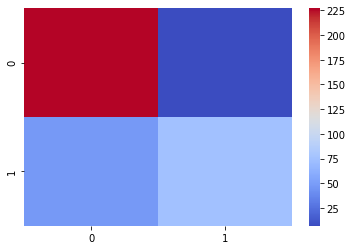

In [94]:
clf1 = tree.DecisionTreeClassifier(max_depth=5, max_features = 5)
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), cmap="coolwarm");
rez.append(accuracy_score(y_test, y_pred))

In [95]:
# правила дерева решений
text_representation = tree.export_text(clf1)
print(text_representation)

|--- feature_1 <= -0.26
|   |--- feature_0 <= 0.25
|   |   |--- feature_2 <= -2.06
|   |   |   |--- class: 0
|   |   |--- feature_2 >  -2.06
|   |   |   |--- feature_3 <= -0.07
|   |   |   |   |--- feature_3 <= -0.08
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_3 >  -0.08
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  -0.07
|   |   |   |   |--- feature_5 <= 1.10
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_5 >  1.10
|   |   |   |   |   |--- class: 1
|   |--- feature_0 >  0.25
|   |   |--- feature_4 <= -0.03
|   |   |   |--- feature_3 <= -0.33
|   |   |   |   |--- feature_3 <= -0.36
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_3 >  -0.36
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  -0.33
|   |   |   |   |--- class: 1
|   |   |--- feature_4 >  -0.03
|   |   |   |--- feature_3 <= -0.23
|   |   |   |   |--- feature_5 <= 0.43
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_5 >  0.43
|   

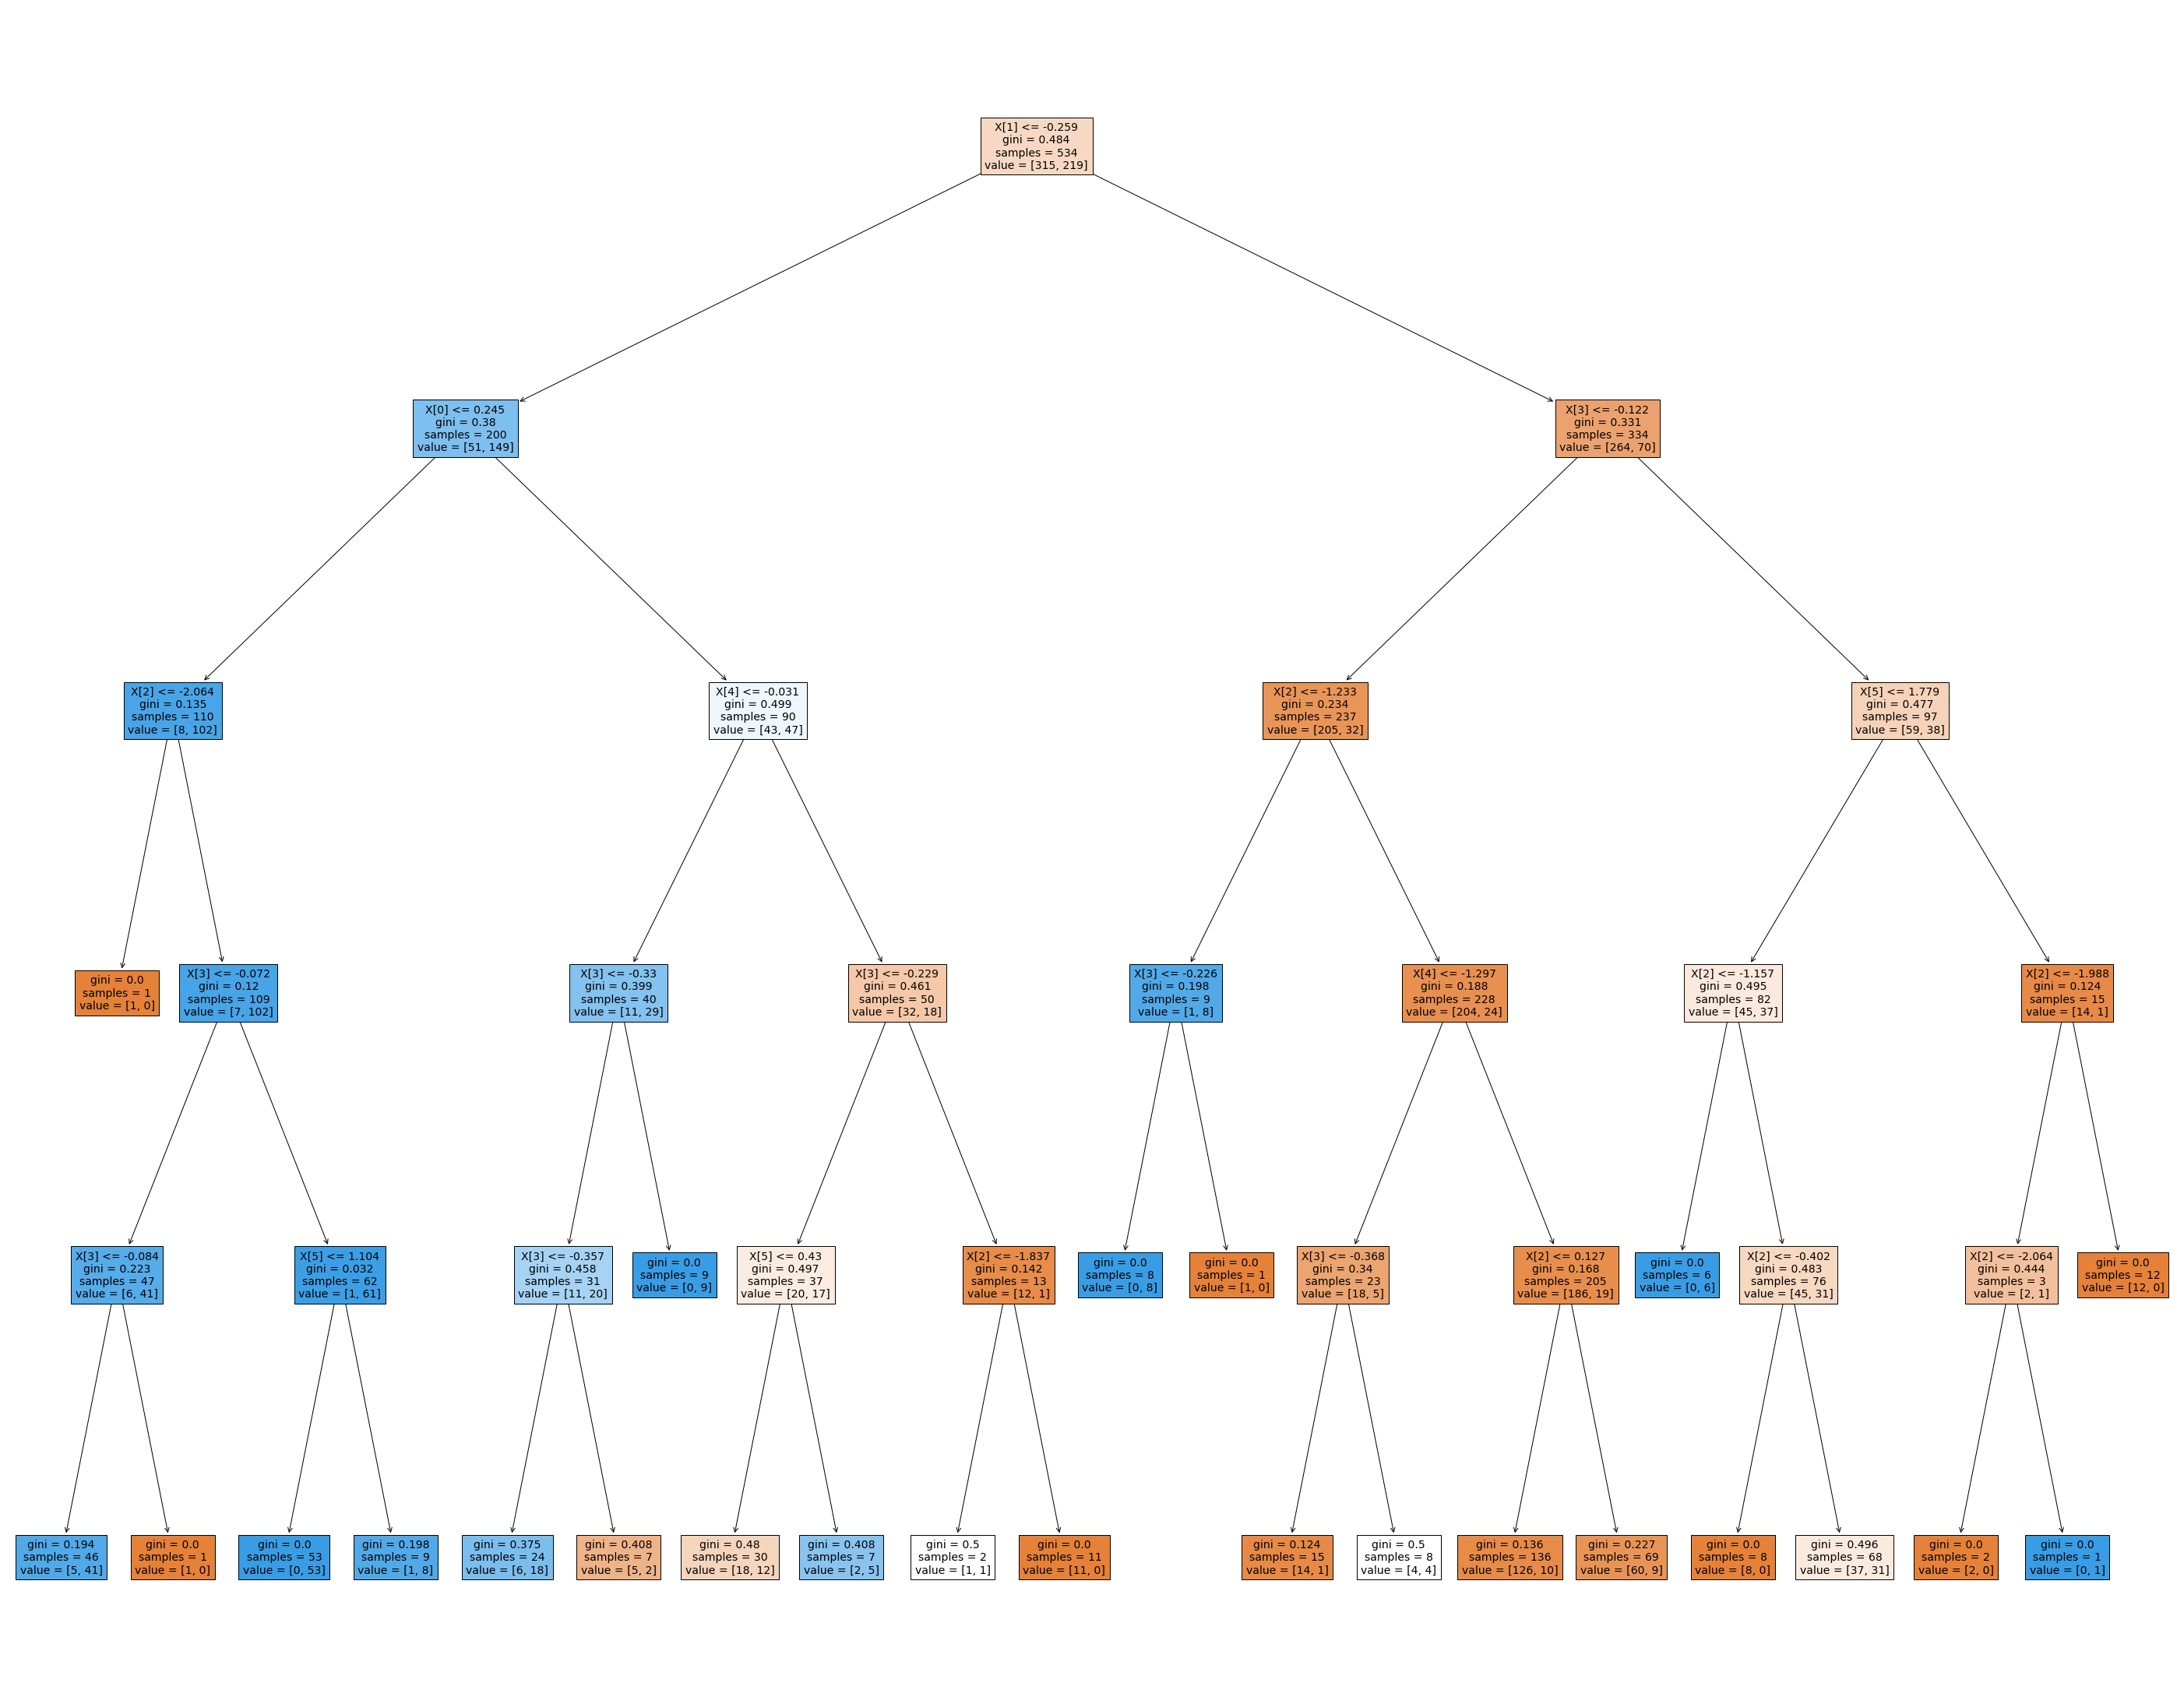

In [96]:
fig = plt.figure(figsize=(50,40))
_ = tree.plot_tree(clf1, filled=True);

#### Случайный лес

In [97]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

Эффективность по количеству деревьев

In [98]:
trees_grid = [5, 10, 15, 20, 30, 50, 75, 100]

cross_ = []
scores_rfc = []
trees_grid = range(45, 65)

for ntrees in trees_grid:
    rfc = RandomForestClassifier(n_estimators=ntrees, oob_score=True,  
                                 random_state=1,  n_jobs=-1) 
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    a_ = accuracy_score(y_test, y_pred)
    scores_rfc.append(a_)
    print(ntrees, " : ", a_)
print("Max: ", trees_grid[scores_rfc.index(max(scores_rfc))], " : ", max(scores_rfc))

45  :  0.8235294117647058
46  :  0.8263305322128851
47  :  0.8319327731092437
48  :  0.8291316526610645
49  :  0.8319327731092437
50  :  0.8319327731092437
51  :  0.834733893557423
52  :  0.834733893557423
53  :  0.8319327731092437
54  :  0.8291316526610645
55  :  0.8291316526610645
56  :  0.8291316526610645
57  :  0.8291316526610645
58  :  0.8235294117647058
59  :  0.8235294117647058
60  :  0.8207282913165266
61  :  0.8235294117647058
62  :  0.8179271708683473
63  :  0.8207282913165266
64  :  0.8151260504201681
Max:  51  :  0.834733893557423


Лучший результат - n_estimators = 51.  
Эффективность по глубине:

In [99]:
max_depth_grid = [3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]
cross_ = []
scores_rfc = []

for max_depth in max_depth_grid:
    rfc = RandomForestClassifier(n_estimators=51,  oob_score=True,  
                                 random_state=1,  n_jobs=-1, 
                                 max_depth = max_depth) 
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    a_ = accuracy_score(y_test, y_pred)
    scores_rfc.append(a_)
    print(max_depth, " : ", a_)
print("Max: ", max_depth_grid[scores_rfc.index(max(scores_rfc))], " : ", max(scores_rfc))

3  :  0.8431372549019608
5  :  0.8319327731092437
7  :  0.8431372549019608
9  :  0.8543417366946778
11  :  0.8235294117647058
13  :  0.8235294117647058
15  :  0.8207282913165266
17  :  0.8319327731092437
20  :  0.834733893557423
22  :  0.834733893557423
24  :  0.834733893557423
Max:  9  :  0.8543417366946778


Лучший результат - при max_depth = 9.  
Минимальное количество выборок, которое требуется для конечного узла. 

In [100]:
min_samples_leaf_grid = [3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]
cross_ = []
scores_rfc = []

for i in min_samples_leaf_grid:
    rfc = RandomForestClassifier(n_estimators=51,  oob_score=True,  
                                 random_state=1,  n_jobs=-1, 
                                 max_depth = 9, min_samples_leaf = i) 
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    a_ = accuracy_score(y_test, y_pred)
    scores_rfc.append(a_)
    print(i, " : ", a_)
print("Min: ", min_samples_leaf_grid[scores_rfc.index(max(scores_rfc))], " : ", max(scores_rfc))

3  :  0.8319327731092437
5  :  0.8403361344537815
7  :  0.8375350140056023
9  :  0.8403361344537815
11  :  0.8291316526610645
13  :  0.834733893557423
15  :  0.8011204481792717
17  :  0.803921568627451
20  :  0.7871148459383753
22  :  0.7955182072829131
24  :  0.8011204481792717
Min:  5  :  0.8403361344537815


min_samples_leaf ухудшает результаты.  
Максимальное число признаков: 

In [101]:
max_features_grid = range(1, 6)
cross_ = []
scores_rfc = []

for i in max_features_grid:
    rfc = RandomForestClassifier(n_estimators=51,  oob_score=True,  
                                 random_state=1,  n_jobs=-1, 
                                 max_depth = 9, max_features = i) 
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    a_ = accuracy_score(y_test, y_pred)
    scores_rfc.append(a_)
    print(i, " : ", a_)
print("Max_features: ", max_features_grid[scores_rfc.index(max(scores_rfc))], " : ", max(scores_rfc))

1  :  0.8403361344537815
2  :  0.8543417366946778
3  :  0.8403361344537815
4  :  0.8543417366946778
5  :  0.8319327731092437
Max_features:  2  :  0.8543417366946778


Таким образом, наилучший результат:

Accuracy_score =  0.8543417366946778
Средняя абсолютная ошибка 0.14565826330532214
Среднеквадратическая ошибка 0.14565826330532214
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       234
           1       0.81      0.76      0.78       123

    accuracy                           0.85       357
   macro avg       0.84      0.83      0.84       357
weighted avg       0.85      0.85      0.85       357

[[212  22]
 [ 30  93]]


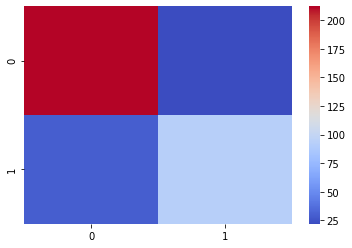

In [102]:
rfc = RandomForestClassifier(n_estimators=51,  oob_score=True,  
                                 random_state=1,  n_jobs=-1, 
                                 max_depth = 9, max_features = 2)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("Accuracy_score = ", accuracy_score(y_test, y_pred))
print('Средняя абсолютная ошибка', mean_absolute_error(y_test, y_pred))
print('Среднеквадратическая ошибка', mean_squared_error(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), cmap="coolwarm");
rez.append(accuracy_score(y_test, y_pred))

#### Оценка всех алгоритмов

In [107]:
b = ["KNN", "LOG_REG", "TREE_DES", "RAND_FORS"]
pd.DataFrame({'model': b, 'result': rez})

,model,result
0,KNN,84.593838
1,LOG_REG,82.913165
2,TREE_DES,84.593838
3,RAND_FORS,85.434174


Для данного набора признаков наиболее эффективным оказался случайный лес.